In [23]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Credit.csv")
df.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [24]:
con = []
cat =[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df[con]), columns=con)

In [26]:
X = df[["Income", "Rating", "Limit"]]
y = df[["Balance"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()
tp = {"n_neighbors": range(2, 20, 1)}
cv = GridSearchCV(knr, tp, scoring="neg_mean_squared_error", cv=5)
cv_model = cv.fit(X_train, y_train)
cv_model.best_params_

{'n_neighbors': 7}

In [28]:
knr = KNeighborsRegressor(n_neighbors=cv_model.best_params_["n_neighbors"])
model = knr.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

0.07674399690721126


Bad key "text.kerning_factor" on line 4 in
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


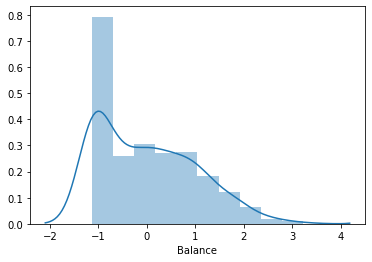

In [33]:
import seaborn as sb
sb.distplot(df.Balance)